## 2-opt for vehicle routing in python

I'm curious to build a little module to implement 2-opt for vehicle routing. 

In [104]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import rand
from scipy.spatial import distance_matrix

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [127]:
"""
Initiate a random TSP instance with n cities in a unit box
"""
class TSPInstance:
    def __init__(self, n: int = 10):
        self.cities = [(rand(), rand()) for _ in range(n)]
        self.distance = distance_matrix(self.cities, self.cities)

In [128]:
"""
solve TSP 
"""
class TSPTour:
    def solve2Opt(self, T: TSPInstance, maxIter: int = 1000) -> list[int]:
        # construct an initial solution based on original ordering
        n = len(T.cities)
        tour = list(range(n)) # city indices

        # perform 2opt until no improvements are made
        foundImprovement = False
        iter = 0
        while not foundImprovement and iter < maxIter:
            iter += 1
            for i in range(n-3):
                for j in range(i+2, n-1):
                    oldDistance = T.distance[tour[i]][tour[i+1]] + T.distance[tour[j]][tour[j+1]]
                    newDistance = T.distance[tour[i]][tour[j]] + T.distance[tour[i+1]][tour[j+1]]
                    if newDistance < oldDistance:
                        foundImprovement = True
                        tour = self.swap2Opt(T, tour, i, j)
        return tour
    
    def swap2Opt(self, T: TSPInstance, tour: list[int], i: int, j: int) -> list[int]:
        return tour[:(i+1)] + [city for city in reversed(tour[(i+1):(j+1)])] + tour[(j+1):]

In [131]:
T = TSPInstance()
TT = TSPTour()
optimalTour = TT.solve2Opt(T)

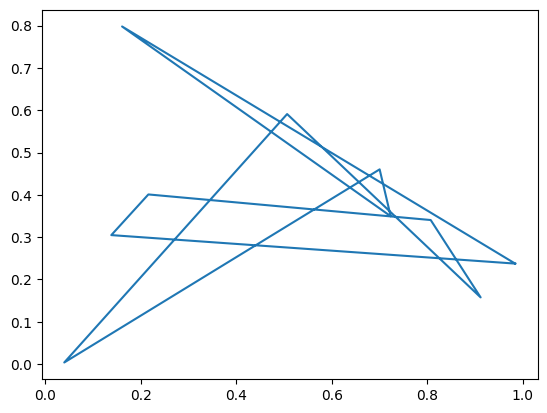

In [132]:
data = [list(city) for city in T.cities]
plt.plot([d[0] for d in data] + [data[0][0]], [d[1] for d in data] + [data[0][1]])

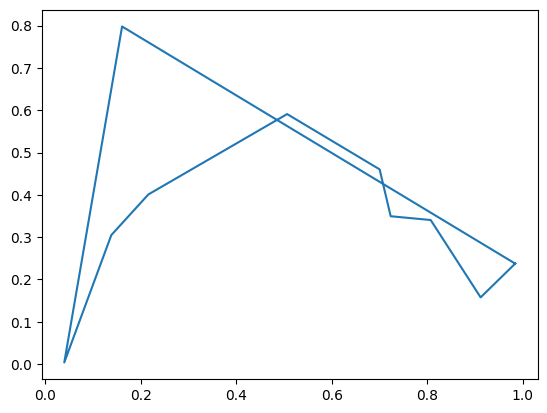

In [133]:
data = [T.cities[city] for city in optimalTour]
plt.plot([d[0] for d in data] + [data[0][0]], [d[1] for d in data] + [data[0][1]])

It certainly looks better than the initial solution but I'm surprised it still has obvious imperfections upon inspection for such a small case.